In [ ]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# reading from file
df = pd.read_csv('covid-liver.csv',encoding='cp1252')
df

,Cancer,Year,Month,Bleed,Mode_Presentation,Age,Gender,Etiology,Cirrhosis,Size,...,Surveillance_programme,Surveillance_effectiveness,Mode_of_surveillance_detection,Time_diagnosis_1st_Tx,Date_incident_surveillance_scan,PS,Time_MDM_1st_treatment,Time_decisiontotreat_1st_treatment,Prev_known_cirrhosis,Months_from_last_surveillance
0,Y,Prepandemic,1,N,Surveillance,68,M,NAFLD,Y,22.0,...,Y,Consistent,US,0.47,NaN,0.0,0.70,NaN,Y,7.333333
1,Y,Prepandemic,1,N,Surveillance,70,M,ARLD,Y,40.0,...,Y,Consistent,US,NaN,NaN,2.0,NaN,NaN,Y,4.033333
2,Y,Prepandemic,1,N,Surveillance,64,M,ARLD,Y,52.0,...,Y,Consistent,US,NaN,NaN,0.0,NaN,NaN,Y,5.900000
3,Y,Prepandemic,1,N,Incidental,73,M,ARLD,Y,80.0,...,N,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Y,NaN
4,Y,Prepandemic,1,N,Incidental,66,F,ARLD,Y,60.0,...,N,NaN,NaN,NaN,NaN,0.0,NaN,NaN,Y,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,N,Pandemic,12,NaN,Symptomatic,72,F,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Y,NaN
446,N,Pandemic,12,NaN,Symptomatic,63,M,NaN,NaN,75.0,...,NaN,NaN,NaN,2.93,NaN,0.0,1.63,1.63,Y,NaN
447,N,Pandemic,12,NaN,Symptomatic,79,F,NaN,NaN,63.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Y,NaN
448,N,Pandemic,12,NaN,Symptomatic,84,F,NaN,NaN,65.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Y,NaN


In [ ]:
df.shape

(450, 27)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cancer                              450 non-null    object 
 1   Year                                450 non-null    object 
 2   Month                               450 non-null    int64  
 3   Bleed                               310 non-null    object 
 4   Mode_Presentation                   450 non-null    object 
 5   Age                                 450 non-null    int64  
 6   Gender                              450 non-null    object 
 7   Etiology                            311 non-null    object 
 8   Cirrhosis                           311 non-null    object 
 9   Size                                400 non-null    float64
 10  HCC_TNM_Stage                       311 non-null    object 
 11  HCC_BCLC_Stage                      311 non-n

In [ ]:
# renaming size column
df.rename(columns = {'Size':'Size_of_Tumor'}, inplace = True)

# **Data Cleaning**

In [ ]:
# Since most of the values of the columns (Mode_of_surveillance_detection, Time_diagnosis_1st_Tx,
# Time_MDM_1st_treatment, Date_incident_surveillance_scan Time_decisiontotreat_1st_treatment,
# Months_from_last_surveillance) are null and can't be predicted as well as they don't have a direct
# effect on (Cancer) column, then these columns are going to be dropped in order to reduce the null values in our dataset.

df.drop(df.columns[[19, 20, 21, 23, 24, 26]], axis=1, inplace=True)

# HCC_TNM_Stage, ICC_TNM_Stage and HCC_BCLC_Stage are found to be referring to the same stage of cancer
# but according to different organizations, thus we kept one of them that had the least number of nulls
# and dropped the other 2
df.drop(df.columns[[10,12]], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Cancer                      450 non-null    object 
 1   Year                        450 non-null    object 
 2   Month                       450 non-null    int64  
 3   Bleed                       310 non-null    object 
 4   Mode_Presentation           450 non-null    object 
 5   Age                         450 non-null    int64  
 6   Gender                      450 non-null    object 
 7   Etiology                    311 non-null    object 
 8   Cirrhosis                   311 non-null    object 
 9   Size_of_Tumor               400 non-null    float64
 10  HCC_BCLC_Stage              311 non-null    object 
 11  Treatment_grps              448 non-null    object 
 12  Survival_fromMDM            450 non-null    float64
 13  Alive_Dead                  450 non

In [ ]:
# For 400-450 not null data --> null values will be filled by most frequent non-null values

df.Size_of_Tumor= df.Size_of_Tumor.fillna(df.Size_of_Tumor.value_counts().index[0])
df.Treatment_grps= df.Treatment_grps.fillna(df.Treatment_grps.value_counts().index[0])
df.PS= df.PS.fillna(df.PS.value_counts().index[0])
df.Prev_known_cirrhosis= df.Prev_known_cirrhosis.fillna(df.Prev_known_cirrhosis.value_counts().index[0])

# For 300-399 not null data --> null values will be filled by "unknowns"

df[['Bleed', 'Etiology', 'Cirrhosis', 'HCC_BCLC_Stage','Surveillance_programme']]= df[
    ['Bleed', 'Etiology', 'Cirrhosis', 'HCC_BCLC_Stage', 'Surveillance_programme']
    ].fillna("Unknown")

In [ ]:
# From the info above there are 2 columns which are (Type_of_incidental_finding, Surveillance_effectiveness)
# that have 115-140 only not null data and the rest are null, however they are important in the prediction of Cancer.
# Therefore, empty values are going to be filled by percentile method

# Filling missing values of Type_of_incidental_finding with the different percentages of its main values

incidental_finding_dict = dict(df['Type_of_incidental_finding'].value_counts(normalize=True))

S_care_acute_count = round(incidental_finding_dict['Secondary care—acute'] * len(df))
S_care_acute_filling = S_care_acute_count - len(df[df['Type_of_incidental_finding']=='Secondary care—acute'])
df['Type_of_incidental_finding'].fillna('Secondary care—acute', limit=S_care_acute_filling, inplace=True)

P_care_routine_count = round(incidental_finding_dict['Primary care—routine'] * len(df))
P_care_routine_filling = P_care_routine_count - len(df[df['Type_of_incidental_finding']=='Primary care—routine'])
df['Type_of_incidental_finding'].fillna('Primary care—routine', limit=P_care_routine_filling, inplace=True)

S_care_routine_count = round(incidental_finding_dict['Secondary care—routine'] * len(df))
S_care_routine_filling = S_care_routine_count - len(df[df['Type_of_incidental_finding']=='Secondary care—routine'])
df['Type_of_incidental_finding'].fillna('Secondary care—routine', limit=S_care_routine_filling, inplace=True)

P_care_acute_count = round(incidental_finding_dict['Primary care—acute'] * len(df))
P_care_acute_filling = P_care_acute_count - len(df[df['Type_of_incidental_finding']=='Primary care—acute'])
df['Type_of_incidental_finding'].fillna('Primary care—acute', limit=P_care_acute_filling, inplace=True)
incidental_finding_dict

{'Secondary care—acute': 0.532258064516129,
 'Primary care—routine': 0.24193548387096775,
 'Secondary care—routine': 0.18548387096774194,
 'Primary care—acute': 0.04032258064516129}

In [ ]:
# Filling missing values of Surveillance_effectiveness with the different percentages of its main values

Surv_effect_dict = dict(df['Surveillance_effectiveness'].value_counts(normalize=True))

Consistent_count = round(Surv_effect_dict['Consistent'] * len(df))
Consistent_filling = Consistent_count - len(df[df['Surveillance_effectiveness']=='Consistent'])
df['Surveillance_effectiveness'].fillna('Consistent', limit=Consistent_filling, inplace=True)

InConsistent_count = round(Surv_effect_dict['Inconsistent'] * len(df))
InConsistent_filling = InConsistent_count - len(df[df['Surveillance_effectiveness']=='Inconsistent'])
df['Surveillance_effectiveness'].fillna('Inconsistent', limit=InConsistent_filling, inplace=True)

Missed_count = round(Surv_effect_dict['Missed'] * len(df))
Missed_filling = Missed_count - len(df[df['Surveillance_effectiveness']=='Missed'])
df['Surveillance_effectiveness'].fillna('Missed', limit=Missed_filling, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Cancer                      450 non-null    object 
 1   Year                        450 non-null    object 
 2   Month                       450 non-null    int64  
 3   Bleed                       450 non-null    object 
 4   Mode_Presentation           450 non-null    object 
 5   Age                         450 non-null    int64  
 6   Gender                      450 non-null    object 
 7   Etiology                    450 non-null    object 
 8   Cirrhosis                   450 non-null    object 
 9   Size_of_Tumor               450 non-null    float64
 10  HCC_BCLC_Stage              450 non-null    object 
 11  Treatment_grps              450 non-null    object 
 12  Survival_fromMDM            450 non-null    float64
 13  Alive_Dead                  450 non

In [ ]:
# one way for checking for any duplicated rows to drop them
boolean = df.duplicated().any()
boolean

False

In [ ]:
# another way for checking for any duplicated rows by comparing dataframe size
# before and after dropping duplicates (if any)

df2 = df.drop_duplicates(keep='first')
print("Size of dataframe before dropping duplicates=", df.size)
print("Size of dataframe after dropping duplicates (if any)=", df2.size)


Size of dataframe before dropping duplicates= 8550
Size of dataframe after dropping duplicates (if any)= 8550


In [ ]:
# Creating new file with cleaned data
df.to_csv('covid_liver_new.csv', index=False)

# **Data Analysis**

In [ ]:
df = pd.read_csv('covid_liver_new.csv')
df.describe()

,Month,Age,Size_of_Tumor,Survival_fromMDM,PS
count,450.000000,450.000000,450.000000,450.000000,450.000000
mean,6.757778,70.371111,49.648889,12.696622,1.224444
std,3.449476,10.572586,39.397481,9.703300,1.027821
min,1.000000,27.000000,10.000000,-0.030000,0.000000
25%,4.000000,65.000000,20.000000,4.032500,0.000000
50%,7.000000,72.000000,36.000000,10.785000,1.000000
75%,10.000000,78.000000,66.500000,21.282500,2.000000
max,12.000000,96.000000,220.000000,32.770000,4.000000


Analyzing Cancer Column

In [ ]:
# Counting values of cancer
df.Cancer.value_counts()

Y    310
N    140
Name: Cancer, dtype: int64

In [ ]:
# Calculating percentages of cancer values
df.Cancer.value_counts()/len(df) *100

Y    68.888889
N    31.111111
Name: Cancer, dtype: float64

In [ ]:
# Calculating the percentage of males and females with and without cancer
with_cancer= df[ df.Cancer == 'Y' ].Gender.value_counts() / len(df[ df.Cancer == 'Y' ]) *100
without_cancer= df[ df.Cancer == 'N' ].Gender.value_counts() / len(df[ df.Cancer == 'N' ])*100
print("Males and females with cancer\n", with_cancer)
print("\nMales and females without cancer\n",without_cancer)

Males and females with cancer
 M    79.677419
F    20.322581
Name: Gender, dtype: float64

Males and females without cancer
 M    62.857143
F    37.142857
Name: Gender, dtype: float64


In [ ]:
pd.crosstab(df.Cirrhosis, df.Cancer)

Cancer,N,Y
Cirrhosis,,
N,0,96
Unknown,139,0
Y,1,214


In [ ]:
# According to the output, cancer affects the cirrhosis with a great probability, however this
# doesn't mean that if someone doesn't have cancer, they won't have cirrhosis but with smaller probability.

In [ ]:
Crosstab=pd.crosstab(index=df['Cirrhosis'],columns=df['Cancer'])

# Performing Chi-sq test
# Chi-square test between two categorical variables to find the correlation

ChiSqResult = chi2_contingency(Crosstab)

# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

#the P-value is lower than 0.05. Which means that cancer and cirrhosis are correlated with each other.

The P-Value of the ChiSq Test is: 1.9598195489871746e-97


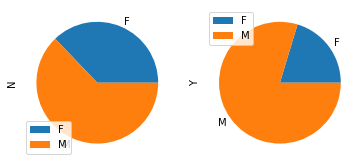

In [ ]:
pd.crosstab(df.Gender, df.Cancer).plot(kind = 'pie',subplots=True);

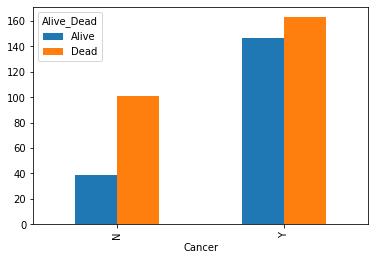

In [ ]:
pd.crosstab(df.Cancer, df.Alive_Dead).plot(kind ='bar');

Analyzing size of tumor and comparing it with different attributes

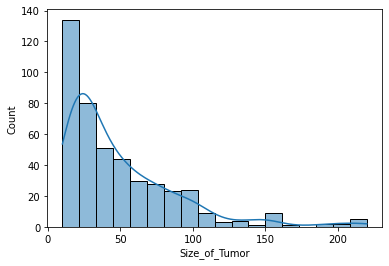

In [ ]:
sns.histplot(df['Size_of_Tumor'],kde=True);

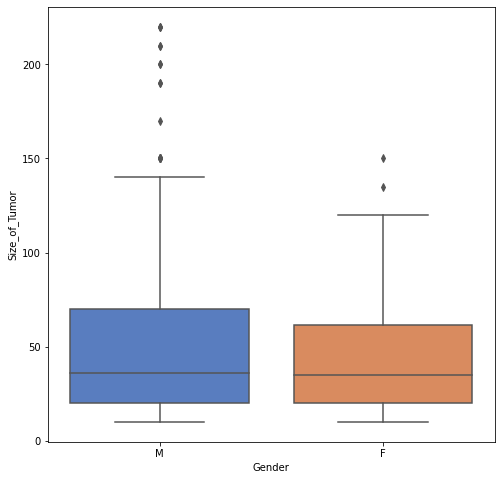

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Gender', y='Size_of_Tumor', data=df, palette="muted")
plt.show()

In [ ]:
df[['Size_of_Tumor', 'Age']].corr()

,Size_of_Tumor,Age
Size_of_Tumor,1.00000,0.07825
Age,0.07825,1.00000


In [ ]:
# from the above, the age and size of tumor aren't related to eachother

Analyzing Cirrhosis column and comparing it to other attributes

In [ ]:
df.Cirrhosis.value_counts()

Y          215
Unknown    139
N           96
Name: Cirrhosis, dtype: int64

In [ ]:
df.iloc[100:121,[8,13,18]]

,Cirrhosis,Alive_Dead,Prev_known_cirrhosis
100,N,Dead,N
101,N,Alive,N
102,N,Alive,N
103,Y,Dead,Y
104,Y,Dead,N
105,Y,Dead,Y
106,Y,Dead,Y
107,Y,Dead,N
108,N,Alive,N
109,Y,Dead,N


In [ ]:
pd.crosstab(df.Cirrhosis, df.Prev_known_cirrhosis)

Prev_known_cirrhosis,N,Y
Cirrhosis,,
N,92,4
Unknown,0,139
Y,80,135


In [ ]:
# based on the previous result, people with cirrhosis most of the time already know they have cirrhosis previously

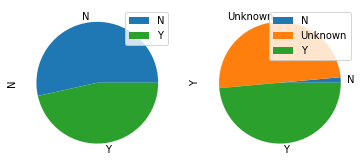

In [ ]:
pd.crosstab(df.Cirrhosis, df.Prev_known_cirrhosis).plot(kind = 'pie',subplots=True);

In [ ]:
pd.crosstab(df.Cirrhosis, df.Alive_Dead)

Alive_Dead,Alive,Dead
Cirrhosis,,
N,47,49
Unknown,38,101
Y,101,114


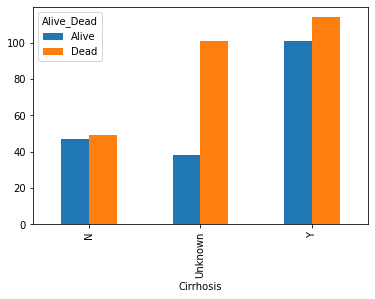

In [ ]:
pd.crosstab(df.Cirrhosis, df.Alive_Dead).plot(kind ='bar');

In [ ]:
# based on the previous data, the probability of people who had cirrhosis and died is greater
# than those who had and are alive.

Analyzing HCC_BCLC_Stage column

In [ ]:
df.iloc[100:121,[6,9,10,13]]

,Gender,Size_of_Tumor,HCC_BCLC_Stage,Alive_Dead
100,M,90.0,C,Dead
101,M,60.0,C,Alive
102,M,21.0,C,Alive
103,M,37.0,C,Dead
104,M,80.0,D,Dead
105,M,20.0,C,Dead
106,M,42.0,D,Dead
107,M,36.0,D,Dead
108,F,150.0,C,Alive
109,F,50.0,C,Dead


In [ ]:
df.HCC_BCLC_Stage.value_counts()

C          152
Unknown    139
D           67
A           65
B           25
0            2
Name: HCC_BCLC_Stage, dtype: int64

In [ ]:
#Stage 0 (Very early stage)
#Stage A (Early stage)
#Stage B (Intermediate Stage)
#Stage C (Advanced stage)
#Stage D: This means you have severe liver damage (Child-Pugh C), or you are not
# well and need help to look after yourself (PS 3 or 4).

In [ ]:
df.HCC_BCLC_Stage.value_counts()/len(df)

C          0.337778
Unknown    0.308889
D          0.148889
A          0.144444
B          0.055556
0          0.004444
Name: HCC_BCLC_Stage, dtype: float64

In [ ]:
# Performing Chi-sq test

CrosstabResult=pd.crosstab(index=df['HCC_BCLC_Stage'],columns=df['Alive_Dead'])
print(CrosstabResult)

ChiSqResult = chi2_contingency(CrosstabResult)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])
#the P-value came higher than 0.05. Which means the variables are correlated to each other.

Alive_Dead      Alive  Dead
HCC_BCLC_Stage             
0                   2     0
A                  54    11
B                  14    11
C                  66    86
D                  12    55
Unknown            38   101
The P-Value of the ChiSq Test is: 1.7916197821931806e-15


In [ ]:
# according to the data above, the percentage of dead people in C stage is higher than other stages

In [ ]:
pd.crosstab(df.HCC_BCLC_Stage,df.Gender)

Gender,F,M
HCC_BCLC_Stage,,
0,2,0
A,9,56
B,7,18
C,28,124
D,18,49
Unknown,51,88


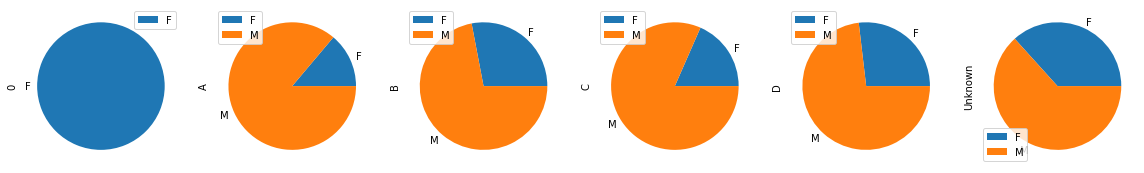

In [ ]:
pd.crosstab(df.Gender, df.HCC_BCLC_Stage).plot(kind = 'pie',subplots=True, figsize=(20,15));

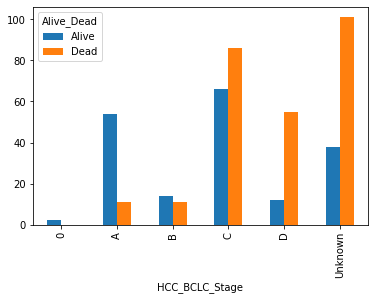

In [ ]:
pd.crosstab(df.HCC_BCLC_Stage, df.Alive_Dead).plot(kind ='bar');

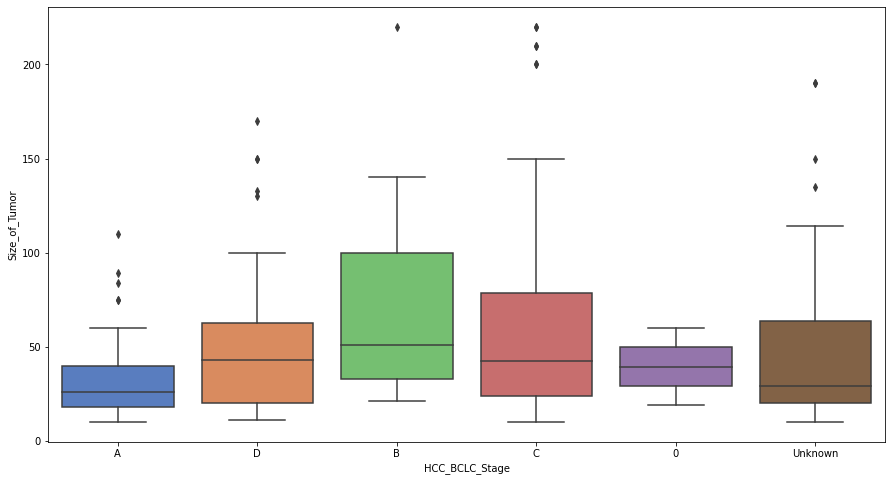

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='HCC_BCLC_Stage', y='Size_of_Tumor', data=df, palette="muted")
plt.show()

In [ ]:
# C stage has highest rate of death, more common in MEN, and has highest size of tumor in comparison to other stages

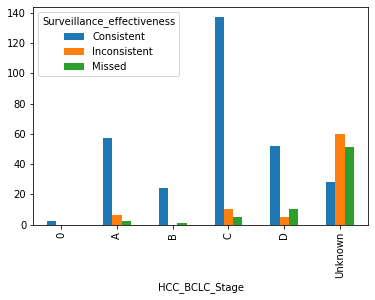

In [ ]:
pd.crosstab(df.HCC_BCLC_Stage, df.Surveillance_effectiveness).plot(kind ='bar');

Analyzing Etiology column

In [ ]:
Etiology = df.Etiology
Etiology.unique()

array(['NAFLD', 'ARLD', 'HCV', 'No established CLD', 'PBC/AIH', 'HH',
       'HBV', 'Other', 'Unknown'], dtype=object)

In [ ]:
Etiology.nunique()

9

In [ ]:
df.Etiology.value_counts()

Unknown               139
NAFLD                 120
ARLD                   95
No established CLD     38
HCV                    24
HH                     15
PBC/AIH                12
HBV                     5
Other                   2
Name: Etiology, dtype: int64

In [ ]:
df.Etiology.value_counts()/len(df)

Unknown               0.308889
NAFLD                 0.266667
ARLD                  0.211111
No established CLD    0.084444
HCV                   0.053333
HH                    0.033333
PBC/AIH               0.026667
HBV                   0.011111
Other                 0.004444
Name: Etiology, dtype: float64

In [ ]:
df2=df.loc[df['Age'] == 66, 'Etiology'].value_counts()
df2

ARLD                  7
NAFLD                 2
No established CLD    2
Unknown               2
Name: Etiology, dtype: int64

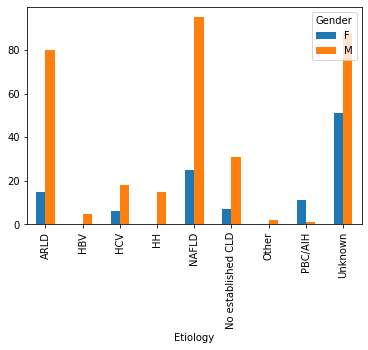

In [ ]:
pd.crosstab(df.Etiology, df.Gender).plot(kind = 'bar');

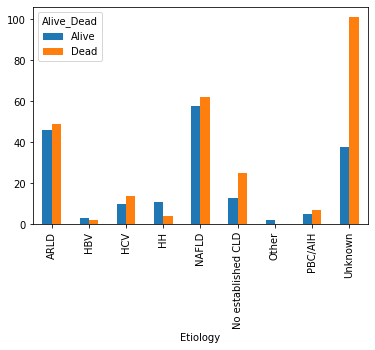

In [ ]:
pd.crosstab(df.Etiology, df.Alive_Dead).plot(kind = 'bar');

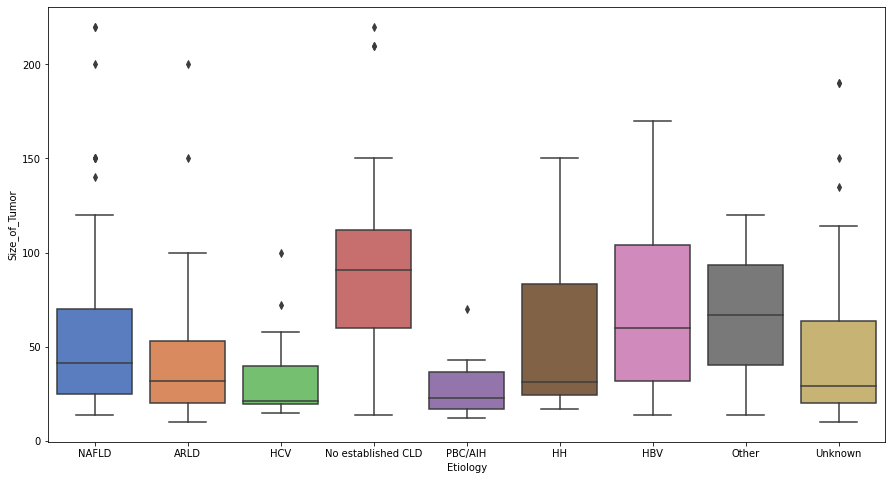

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Etiology', y='Size_of_Tumor', data=df, palette="muted")
plt.show()

Analyzing Type_of_incidental_finding column

In [ ]:
df.Type_of_incidental_finding.value_counts()

Secondary care—acute      240
Primary care—routine      109
Secondary care—routine     83
Primary care—acute         18
Name: Type_of_incidental_finding, dtype: int64

In [ ]:
df2 = df[['Type_of_incidental_finding','Cancer', 'Cirrhosis']]
df2

,Type_of_incidental_finding,Cancer,Cirrhosis
0,Secondary care—acute,Y,Y
1,Secondary care—acute,Y,Y
2,Secondary care—acute,Y,Y
3,Secondary care—acute,Y,Y
4,Secondary care—acute,Y,Y
...,...,...,...
445,Primary care—acute,N,Unknown
446,Primary care—acute,N,Unknown
447,Primary care—acute,N,Unknown
448,Primary care—acute,N,Unknown


In [ ]:
# describing categorical data
df2.describe()

,Type_of_incidental_finding,Cancer,Cirrhosis
count,450,450,450
unique,4,2,3
top,Secondary care—acute,Y,Y
freq,240,310,215


In [ ]:
pd.crosstab(df.Type_of_incidental_finding, df.Cirrhosis)

Cirrhosis,N,Unknown,Y
Type_of_incidental_finding,,,
Primary care—acute,2,13,3
Primary care—routine,20,66,23
Secondary care—acute,64,0,176
Secondary care—routine,10,60,13


In [ ]:
#

In [ ]:
pd.crosstab(df.Type_of_incidental_finding,df.Cancer)

Cancer,N,Y
Type_of_incidental_finding,,
Primary care—acute,13,5
Primary care—routine,66,43
Secondary care—acute,1,239
Secondary care—routine,60,23


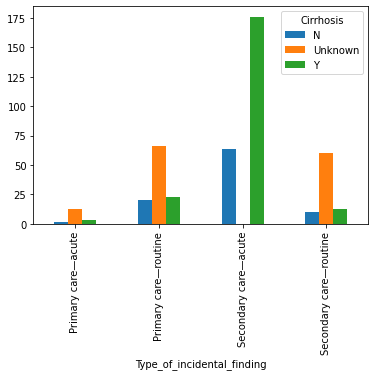

In [ ]:
pd.crosstab(df.Type_of_incidental_finding,df.Cirrhosis).plot(kind ='bar');

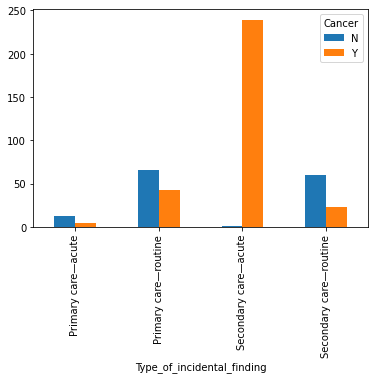

In [ ]:
pd.crosstab(df.Type_of_incidental_finding,df.Cancer).plot(kind ='bar');

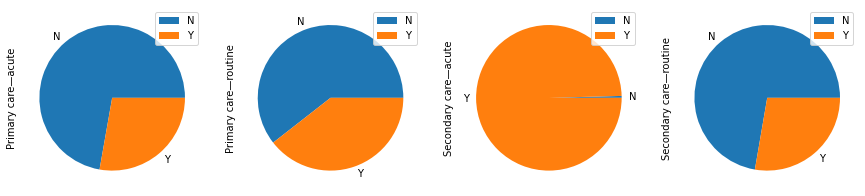

In [ ]:
pd.crosstab(df.Cancer, df.Type_of_incidental_finding).plot(kind = 'pie',subplots=True, figsize=(15,10));

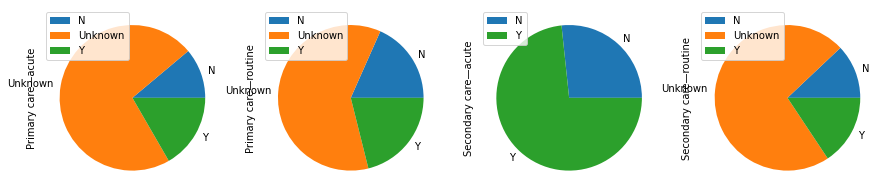

In [ ]:
pd.crosstab(df.Cirrhosis, df.Type_of_incidental_finding).plot(kind = 'pie',subplots=True, figsize=(15,10));

In [ ]:
# Performing Chi-sq test

Crosstab =pd.crosstab(index=df2['Type_of_incidental_finding'],columns=df2['Cancer'])
ChiSqResult = chi2_contingency(Crosstab)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 1.825570700138067e-49


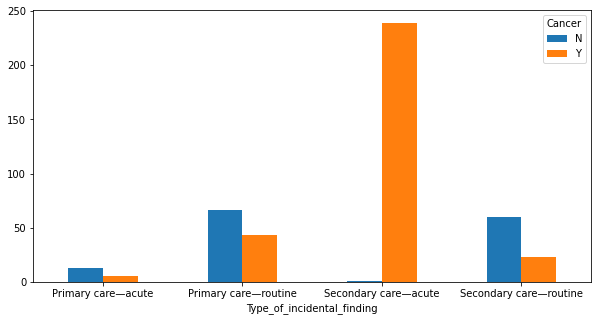

In [ ]:
Crosstab.plot.bar(figsize=(10,5), rot=0);

In [ ]:
# From the previous results, people who had cancer or cirrhosis had more secondary care_acute

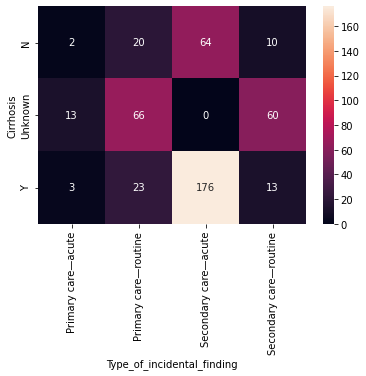

In [ ]:
sns.heatmap(pd.crosstab(df.Cirrhosis, df.Type_of_incidental_finding), annot=True, fmt='d');

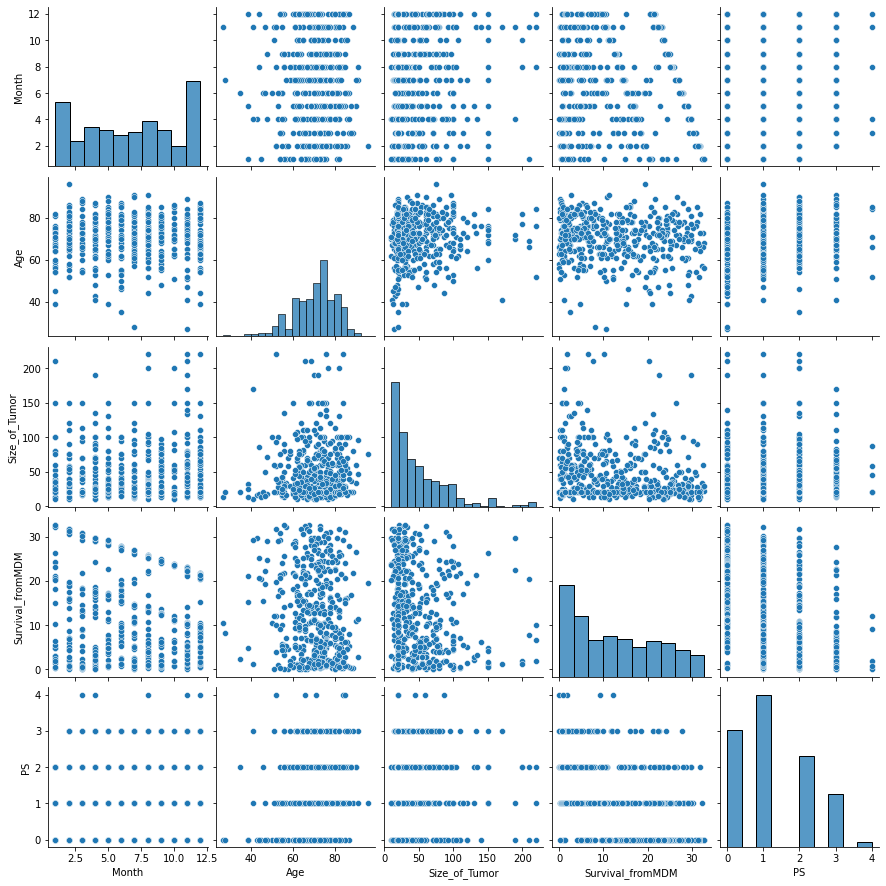

In [ ]:
sns.pairplot(df);

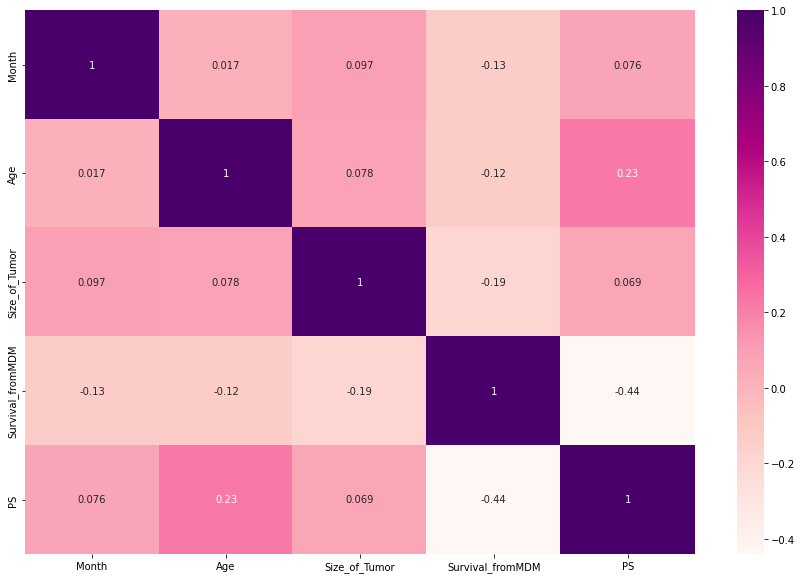

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='RdPu');

# **Data Modelling Using Both Decision Tree and Random Forest Classifications to Compare Between Them**

In [ ]:
df

,Cancer,Year,Month,Bleed,Mode_Presentation,Age,Gender,Etiology,Cirrhosis,Size_of_Tumor,HCC_BCLC_Stage,Treatment_grps,Survival_fromMDM,Alive_Dead,Type_of_incidental_finding,Surveillance_programme,Surveillance_effectiveness,PS,Prev_known_cirrhosis
0,Y,Prepandemic,1,N,Surveillance,68,M,NAFLD,Y,22.0,A,Ablation,32.73,Alive,Secondary care—acute,Y,Consistent,0.0,Y
1,Y,Prepandemic,1,N,Surveillance,70,M,ARLD,Y,40.0,D,Supportive care,3.03,Dead,Secondary care—acute,Y,Consistent,2.0,Y
2,Y,Prepandemic,1,N,Surveillance,64,M,ARLD,Y,52.0,B,Medical,14.97,Dead,Secondary care—acute,Y,Consistent,0.0,Y
3,Y,Prepandemic,1,N,Incidental,73,M,ARLD,Y,80.0,C,Supportive care,1.40,Dead,Secondary care—acute,N,Consistent,2.0,Y
4,Y,Prepandemic,1,N,Incidental,66,F,ARLD,Y,60.0,0,Supportive care,32.50,Alive,Secondary care—acute,N,Consistent,0.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,N,Pandemic,12,Unknown,Symptomatic,72,F,Unknown,Unknown,20.0,Unknown,Supportive care,1.20,Dead,Primary care—acute,Unknown,Missed,1.0,Y
446,N,Pandemic,12,Unknown,Symptomatic,63,M,Unknown,Unknown,75.0,Unknown,Medical,9.67,Alive,Primary care—acute,Unknown,Missed,0.0,Y
447,N,Pandemic,12,Unknown,Symptomatic,79,F,Unknown,Unknown,63.0,Unknown,Supportive care,1.47,Dead,Primary care—acute,Unknown,Missed,1.0,Y
448,N,Pandemic,12,Unknown,Symptomatic,84,F,Unknown,Unknown,65.0,Unknown,Medical,1.67,Dead,Primary care—acute,Unknown,Missed,2.0,Y


In [ ]:
#Extracting Independent and dependent Variable
# x represents independent variables
x = df.loc[:, df.columns != "Cancer"]
# y represents dependent variables
y = df['Cancer']

In [ ]:
# encoding dependent and independent categorical variables into numerical data to perform modelling
x_encoded = pd.get_dummies(x, drop_first=True)
y_encoded = pd.get_dummies(y, drop_first=True)
x_encoded

,Month,Age,Size_of_Tumor,Survival_fromMDM,PS,Year_Prepandemic,Bleed_Unknown,Bleed_Y,Mode_Presentation_Surveillance,Mode_Presentation_Symptomatic,...,Treatment_grps_TACE,Alive_Dead_Dead,Type_of_incidental_finding_Primary care—routine,Type_of_incidental_finding_Secondary care—acute,Type_of_incidental_finding_Secondary care—routine,Surveillance_programme_Unknown,Surveillance_programme_Y,Surveillance_effectiveness_Inconsistent,Surveillance_effectiveness_Missed,Prev_known_cirrhosis_Y
0,1,68,22.0,32.73,0.0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
1,1,70,40.0,3.03,2.0,1,0,0,1,0,...,0,1,0,1,0,0,1,0,0,1
2,1,64,52.0,14.97,0.0,1,0,0,1,0,...,0,1,0,1,0,0,1,0,0,1
3,1,73,80.0,1.40,2.0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
4,1,66,60.0,32.50,0.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,12,72,20.0,1.20,1.0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,1
446,12,63,75.0,9.67,0.0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,1
447,12,79,63.0,1.47,1.0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,1
448,12,84,65.0,1.67,2.0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,1


In [ ]:
# Split the data into train and test data
# 30% of independent variable is for testing and the 70% is for training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_encoded, y_encoded,random_state=100, test_size=0.3)

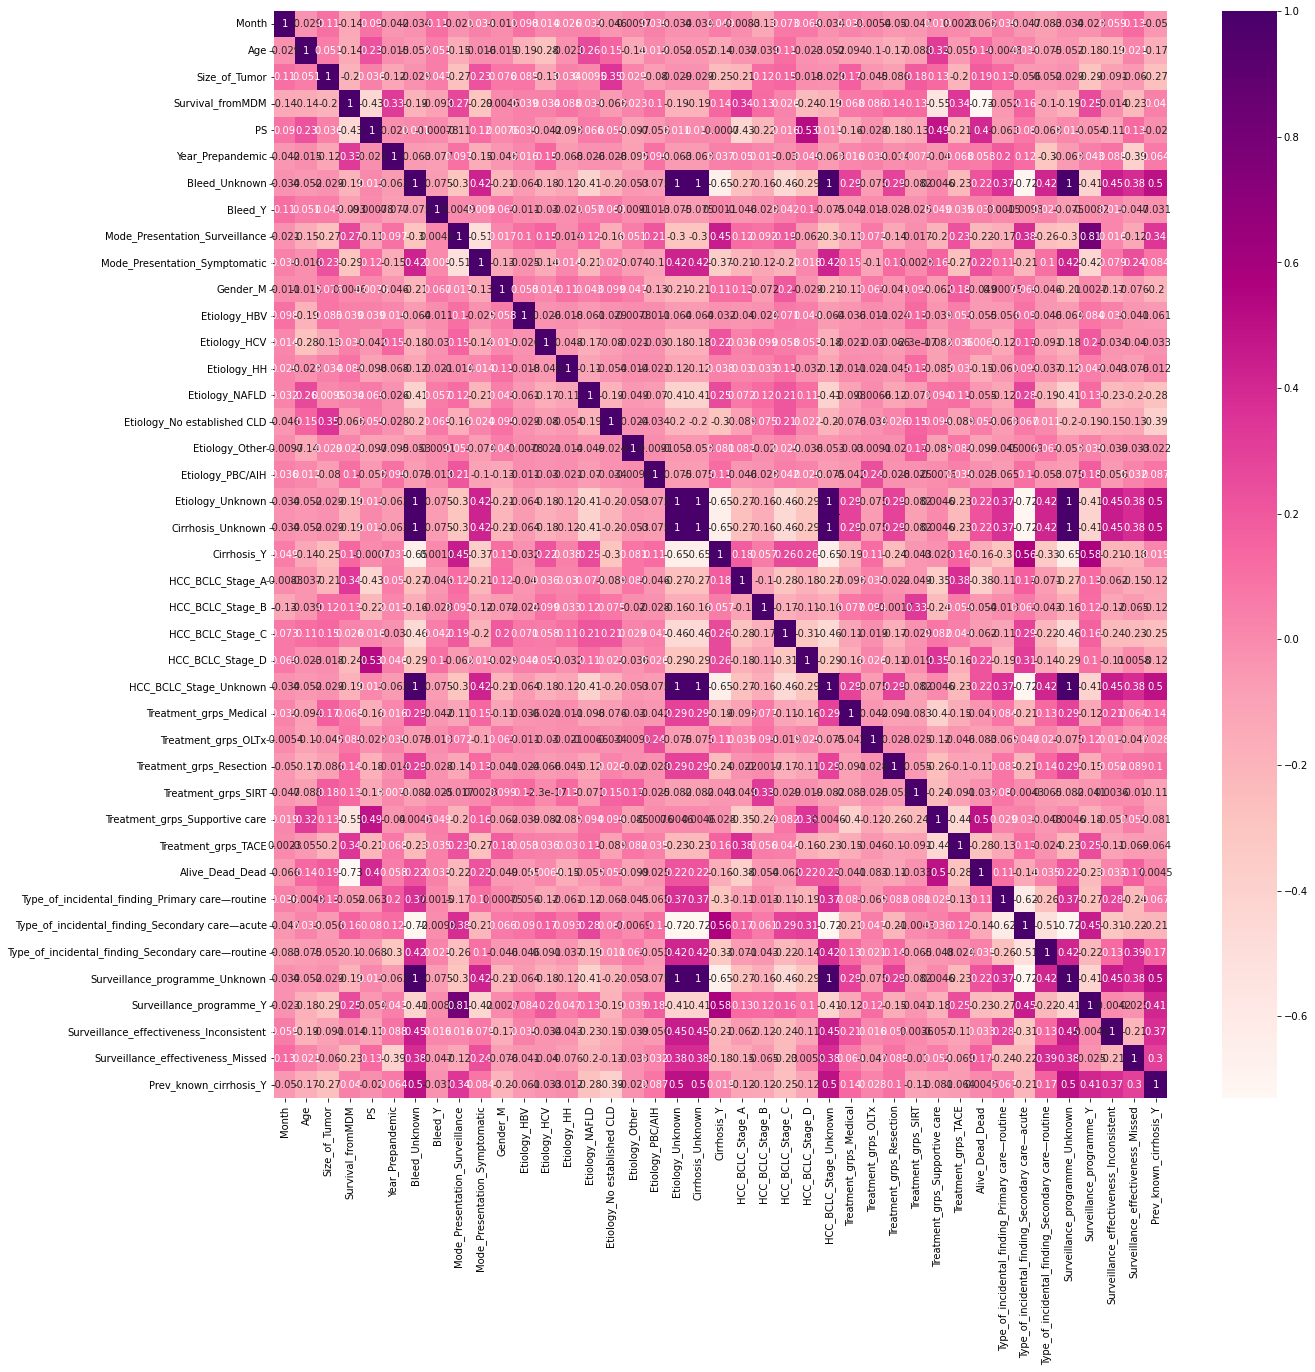

In [ ]:
#Using Pearson Correlation to check for correlated features in X_train in order to drop them

cor = X_train.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cor, cmap='RdPu',annot=True)
plt.show()

In [ ]:
# Another way of checking.
# With the help of this function, highly correlated features can be selected.
# The purpose is to select the correlated features and then remove them.

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
              colname = corr_matrix.columns[i]
              col_corr.add(colname)
    return col_corr

# Getting correlated features
corr_features = correlation(X_train, 0.7)
corr_features

{'Alive_Dead_Dead',
 'Cirrhosis_Unknown',
 'Etiology_Unknown',
 'HCC_BCLC_Stage_Unknown',
 'Surveillance_programme_Unknown',
 'Surveillance_programme_Y',
 'Type_of_incidental_finding_Secondary care—acute'}

In [ ]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,Month,Age,Size_of_Tumor,Survival_fromMDM,PS,Year_Prepandemic,Bleed_Unknown,Bleed_Y,Mode_Presentation_Surveillance,Mode_Presentation_Symptomatic,...,Treatment_grps_OLTx,Treatment_grps_Resection,Treatment_grps_SIRT,Treatment_grps_Supportive care,Treatment_grps_TACE,Type_of_incidental_finding_Primary care—routine,Type_of_incidental_finding_Secondary care—routine,Surveillance_effectiveness_Inconsistent,Surveillance_effectiveness_Missed,Prev_known_cirrhosis_Y
204,2,65,32.0,4.37,3.0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
412,5,82,31.0,4.90,2.0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,1,1
320,2,80,40.0,0.10,3.0,1,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
158,11,73,15.0,22.67,2.0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,1
54,4,86,20.0,4.50,2.0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,3,76,45.0,30.90,0.0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
110,7,78,24.0,26.10,2.0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
335,4,87,20.0,0.47,3.0,1,1,0,0,1,...,0,0,0,1,0,1,0,0,0,1
121,8,61,32.0,25.17,0.0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
X_train.drop(['Bleed_Unknown'], axis=1, inplace=True)
X_test.drop(['Bleed_Unknown'], axis=1, inplace=True)

### ***One way for building a model using decision tree classifier is after selecting best features***

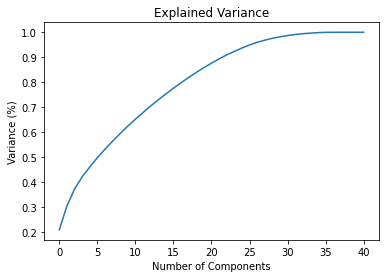

In [ ]:
# Using PCA (Principal Component Analysis) for feature selection

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
x_transform = scalar.fit_transform(x_encoded)

x_trains,x_tests,y_trains,y_tests = train_test_split(x_transform,y,test_size = 0.30, random_state= 355)

pca = PCA()
principalComponents = pca.fit_transform(x_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [ ]:
# Specifying 8 components
pca = PCA(n_components=8)
new_data = pca.fit_transform(x_transform)
principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8'])
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8
0,-3.121533,3.488689,-0.592455,-0.225921,-1.853896,-0.205001,-0.349149,0.009316
1,-2.244923,-0.949108,-3.193354,-0.699287,-0.386645,-1.445345,-0.422796,-0.345973
2,-2.114540,2.224832,-0.689468,-0.462795,1.875283,-1.124803,-3.059886,1.640783
3,-1.623526,-1.835054,-0.681179,-0.655064,0.250100,0.470903,-0.112659,-0.710301
4,-1.588722,0.997932,-0.021950,-0.791410,-0.451774,-0.080804,-0.997240,-1.322945
...,...,...,...,...,...,...,...,...
445,4.275980,-1.096623,-1.314815,1.485566,-0.057372,0.606070,-0.402001,0.243343
446,4.150794,1.186475,0.587477,2.199265,1.448330,0.053866,0.047206,1.496686
447,4.258136,-1.436739,-0.971558,1.441850,0.089017,0.863873,-0.564528,0.487930
448,4.523829,-0.755441,-0.536623,1.542506,1.043047,1.093404,-1.137360,1.496251


In [ ]:
x_trains,x_tests,y_trains,y_tests = train_test_split(principal_x,y,test_size = 0.30, random_state= 355)
clf = DecisionTreeClassifier()

clf.fit(x_trains,y_trains)
print("Accuracy of decision tree after features selection=",clf.score(x_tests,y_tests)*100)

Accuracy of decision tree after features selection= 99.25925925925925


In [ ]:
from sklearn.feature_selection import mutual_info_classif
# mutual_info_classif is a library that is present in feature_selection. It is the property of
# mutual information gain that the value you will get will never be negative. The higher the value
# the more important that feature will be or you can say that the dependency of that independent
# feature will be more on the dependent feature.

#determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.        , 0.        , 0.        , 0.        , 0.00063549,
       0.0218788 , 0.01260842, 0.        , 0.05933433, 0.        ,
       0.        , 0.05334884, 0.        , 0.        , 0.        ,
       0.        , 0.01617075, 0.        , 0.02156893, 0.05363373,
       0.07136689, 0.        , 0.        , 0.02179798, 0.        ,
       0.01046367, 0.02770839, 0.01668946, 0.00393684, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.05093748, 0.        , 0.02737841, 0.        , 0.01577094])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Etiology_HH                                          0.075418
Type_of_incidental_finding_Secondary care—routine    0.037946
HCC_BCLC_Stage_A                                     0.036020
Treatment_grps_Resection                             0.034177
Mode_Presentation_Surveillance                       0.031545
Treatment_grps_Medical                               0.028082
Type_of_incidental_finding_Primary care—routine      0.020146
Etiology_Other                                       0.016501
Etiology_PBC/AIH                                     0.015100
Prev_known_cirrhosis_Y                               0.012681
Bleed_Y                                              0.011712
HCC_BCLC_Stage_B                                     0.010865
Month                                                0.009971
Etiology_HCV                                         0.007420
HCC_BCLC_Stage_D                                     0.005319
Gender_M                                             0.002988
HCC_BCLC

In [ ]:
from sklearn.feature_selection import SelectKBest
#No we Will select the top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
selected_features= X_train.columns[sel_five_cols.get_support()]

selected_features= X_train[selected_features]
selected_features

,PS,Etiology_NAFLD,HCC_BCLC_Stage_C,HCC_BCLC_Stage_D,Type_of_incidental_finding_Secondary care—routine
399,1.0,0,0,0,1
134,0.0,1,0,0,0
197,3.0,0,0,1,0
149,3.0,0,0,1,0
265,1.0,1,1,0,0
...,...,...,...,...,...
343,0.0,0,0,0,0
359,3.0,0,0,0,0
323,0.0,0,0,0,0
280,0.0,0,0,0,0



**1- Decision Tree Classification:**

A decision tree is a type of supervised machine learning used to categorize or make predictions based on how a previous set of questions were answered.

In [ ]:
X_train.shape

(315, 40)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtree = DecisionTreeClassifier(max_depth=2)
dtree.fit(X_train, y_train)
predicitions = dtree.predict(X_test)
acc = accuracy_score(y_test, predicitions)
print("Predictions of decision tree:",predicitions)
print("\nAccuracy of the model with depth 2=",acc*100)

Predictions of decision tree: ['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y']

Accuracy of the model with depth 2= 72.5925925925926


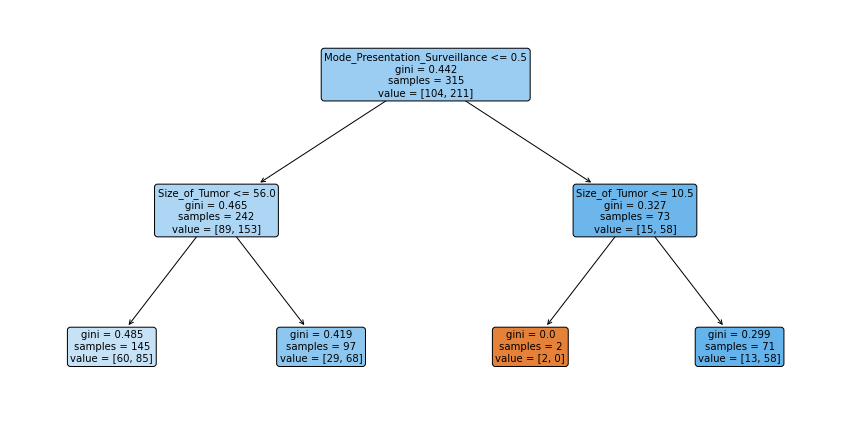

In [ ]:
# Plotting decision Tree with depth 2
from sklearn.tree import plot_tree

plt.figure(figsize=(15,7.5))
plot_tree(dtree, filled= True, rounded= True, feature_names= X_test.columns);

Trying to increase accuracy by increasing the decision tree depth

In [ ]:
dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(X_train, y_train)
predicitions = dtree.predict(X_test)
acc = accuracy_score(y_test, predicitions)
print("Predictions of decision tree:",predicitions)
print("\nAccuracy of the model with depth 3=",acc*100)

Predictions of decision tree: ['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y']

Accuracy of the model with depth 3= 72.5925925925926


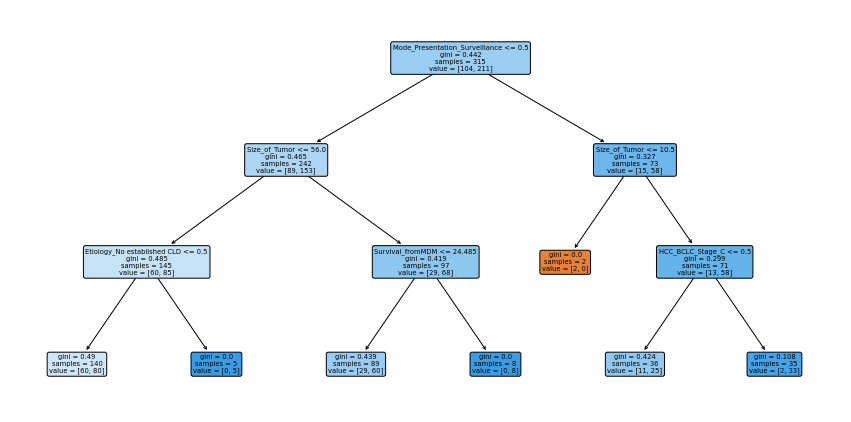

In [ ]:
# Plotting decision Tree with depth 3

plt.figure(figsize=(15,7.5))
plot_tree(dtree, filled= True, rounded= True, feature_names= X_test.columns);

In [ ]:
# By changing the depth of the decision tree, the model becomes more complex and accuracy increases,
# however overfitting might occur by increasing it too much.


**2- Random Forest Classifier:**

Random Forest grows multiple decision trees which are merged together for a more accurate prediction. The logic behind the Random Forest model is that multiple uncorrelated models (the individual decision trees) perform much better as a group than they do alone.

Accuracy is:  0.6888888888888889 

Confusion Matrix: 



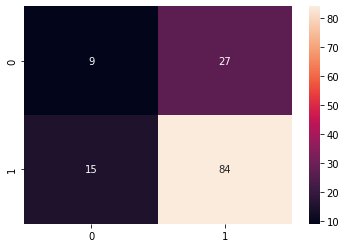

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

#Build a random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)
clr_rf = clf_rf.fit(X_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(X_test))
print('Accuracy is: ',ac,'\n')
cm = confusion_matrix(y_test,clf_rf.predict(X_test))
print("Confusion Matrix: \n")
sns.heatmap(cm,annot=True,fmt="d");

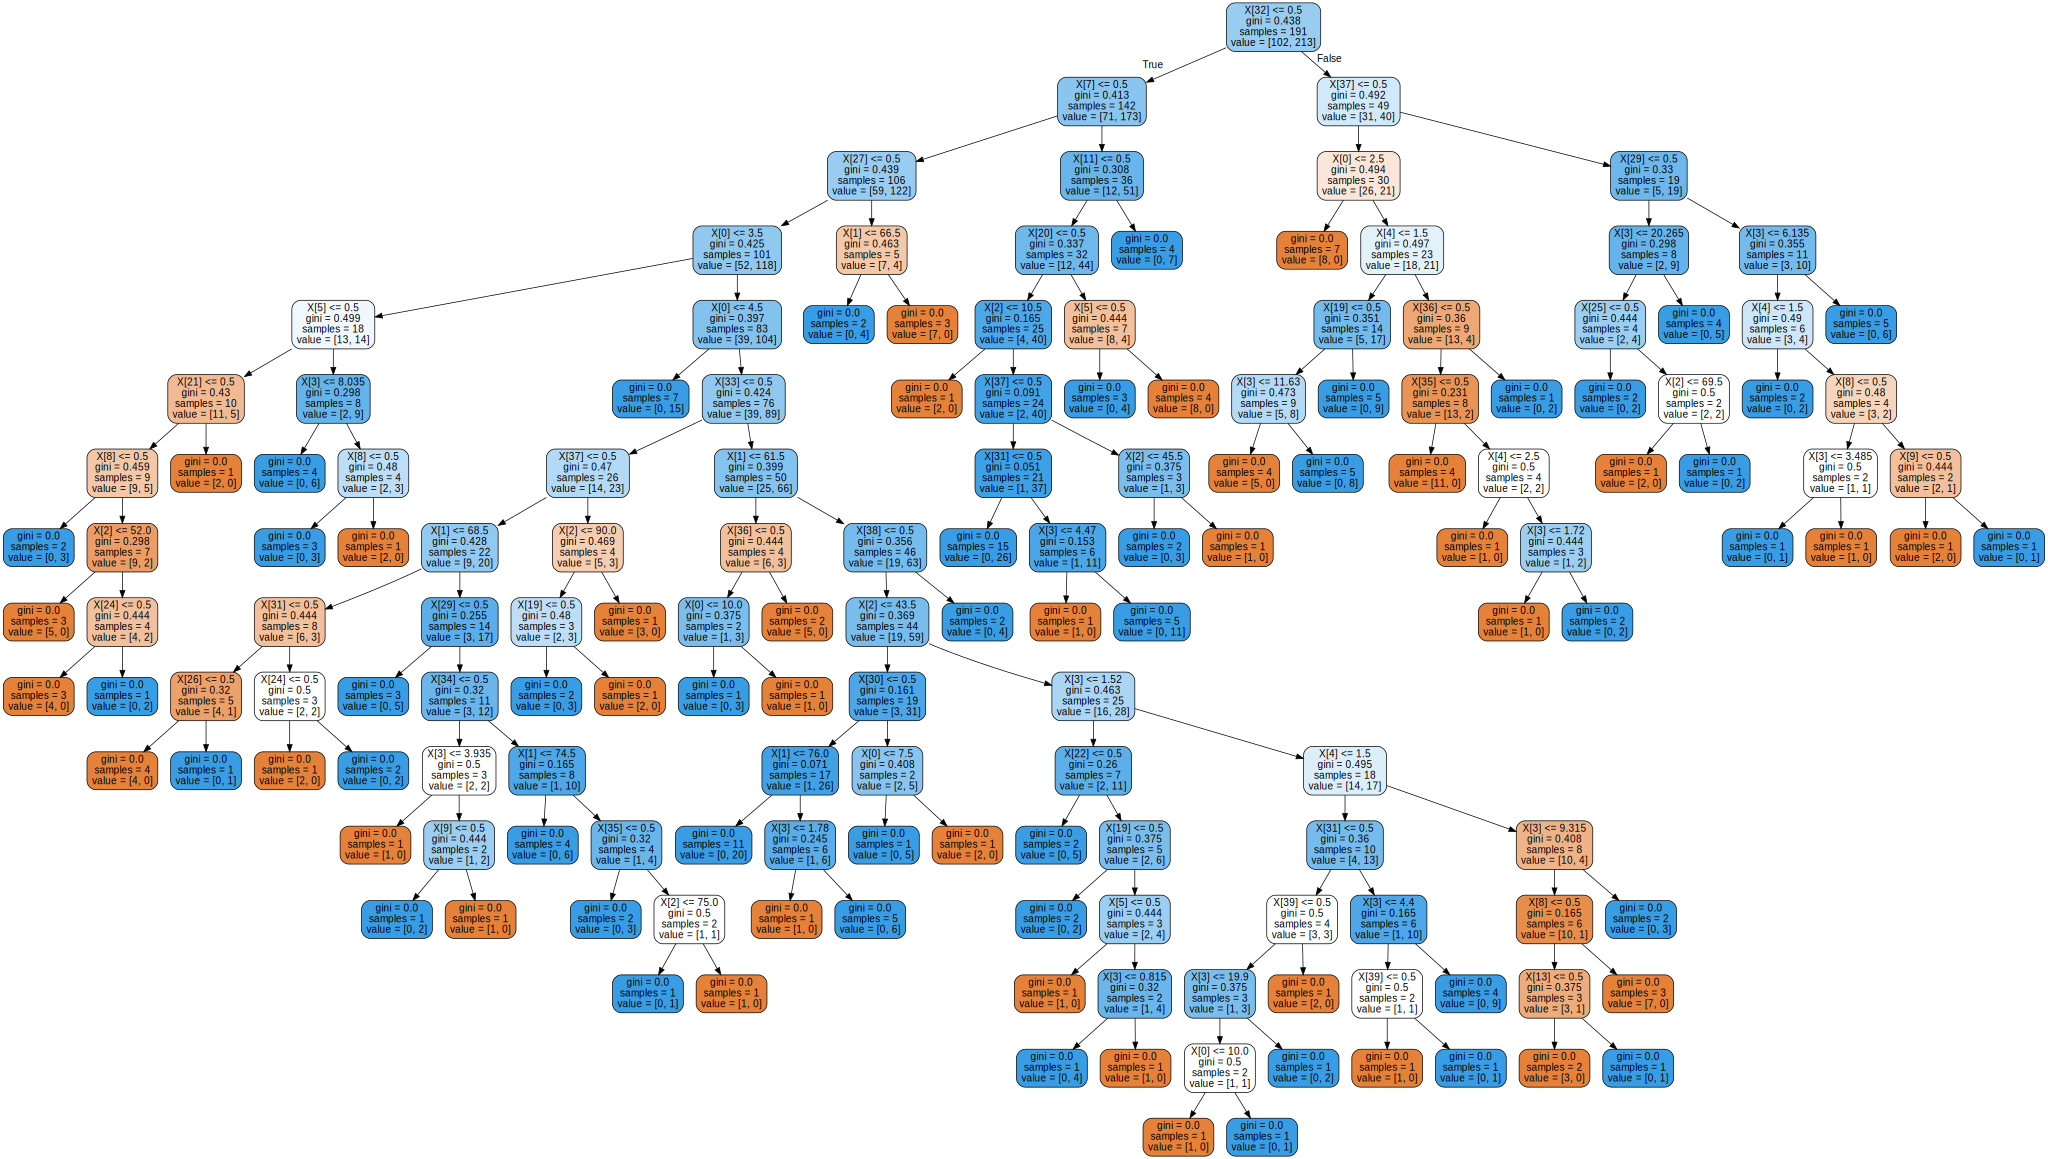

In [ ]:
import graphviz
from sklearn.tree import export_graphviz


dot_data = export_graphviz(clr_rf.estimators_[99],

                           filled=True, impurity=True,
                           rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph

--> According to the results, it was found that the accuracy of decision tree classification is equal to that of the random forest classifier in case we increased decision tree's depth to a certain limit.